In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from heatlib_var import *

## Rešení s konstatní konduktivitou

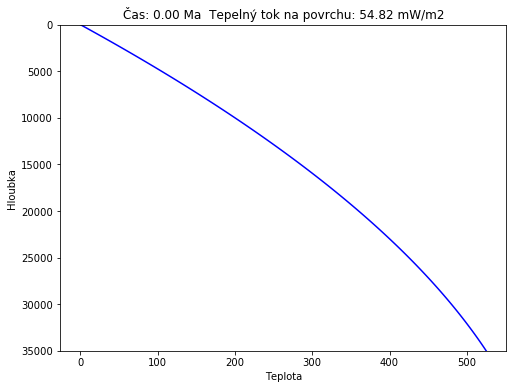

In [3]:
m = dict(n=100, k=2.5*np.ones(99), H=1e-6*np.ones(99),
         rho=2700*ones(99), c=800*ones(99),
         tc=35000, T0=0, q=-0.02)
init(m)
tshow(m)

## Rešení s teplotně závislou konduktivitou

Vypočítejte stabilní geotermu pro teplotně závislou konduktivitu danou vztahem:

$$\lambda=2+\exp \left ( \frac{-T}{1250} \right )+\frac{48}{\exp \left ( \frac{1250-T}{10} \right )}$$

Iterační řešení:

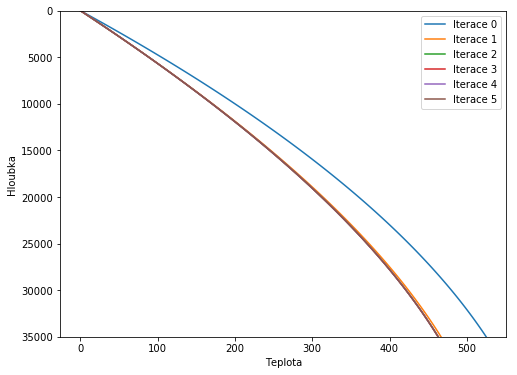

In [4]:
for i in range(5):
    plot(m['t'], m['x'], label='Iterace {}'.format(i))
    # teplota v materialovych uzlech
    tm = (m['t'][1:] + m['t'][:-1]) / 2
    # nova konduktivita
    m['k'] = 2 + np.exp(-tm/1250) + 48/np.exp((1250 - tm)/10)
    # prepocitat
    init(m)
plot(m['t'], m['x'], label='Iterace {}'.format(i + 1))
ylim(m['tc'], 0)
xlabel('Teplota')
ylabel('Hloubka')
legend()

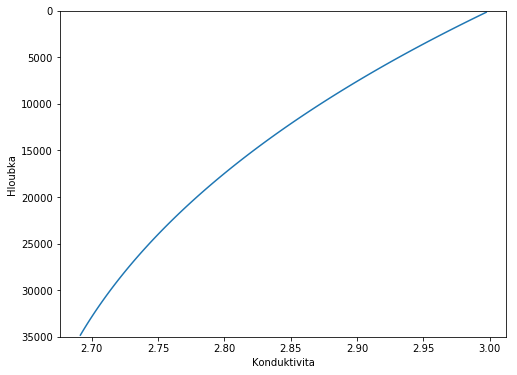

In [5]:
plot(m['k'], m['xm'])
ylim(m['tc'], 0)
xlabel('Konduktivita')
ylabel('Hloubka')

Laserové měření tepelné difuzivity metamorfovaných hornin Moldanubika (*Nabelek, 2010*):

$$D=1.214\cdot 10^{-6}\times \exp \left ( \frac{-T}{285.2} \right )+3.19\cdot 10^{-7}$$

Závislost měrné tepelne kapacity na teplotě byla pro tyto horniny definována (*Whittington, 2009*):

$$c=726+1.53\times T-1.6\cdot 10^{-3}\times T^2+6.64\cdot 10^{-7}\times T^3$$

Tyto odvozené veličiny lze využít pro výpočet tepelné konduktivity:

$$\lambda=\rho \cdot c \cdot D$$

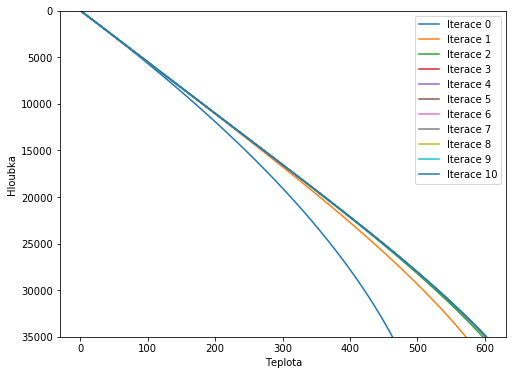

In [6]:
for i in range(10):
    plot(m['t'], m['x'], label='Iterace {}'.format(i))
    Tm = (m['t'][:-1] + m['t'][1:])/2
    D = 1.214e-6*exp(-Tm/285.2) + 3.19e-7
    m['c'] = 726 + 1.53*Tm - 1.6e-3*Tm**2 + 6.64e-7*Tm**3
    m['k'] = m['rho']*m['c']*D
    init(m)
plot(m['t'], m['x'], label='Iterace {}'.format(i + 1))
ylim(m['tc'], 0)
xlabel('Teplota')
ylabel('Hloubka')
legend()

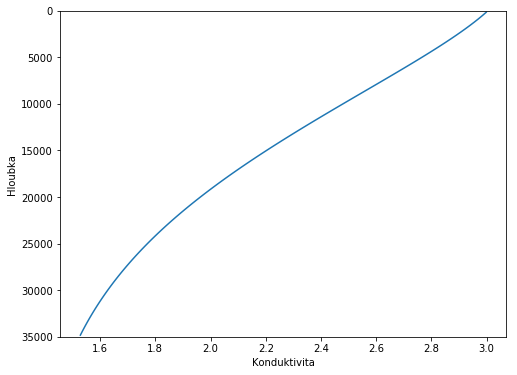

In [7]:
plot(m['k'], m['xm'])
ylim(m['tc'], 0)
xlabel('Konduktivita')
ylabel('Hloubka')